In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [148]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [149]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [150]:
data.shape


(7920, 3)

In [151]:
data.duplicated().sum()

np.int64(0)

In [152]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing

In [153]:
import re
import string

In [154]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

Convert UpperCase to LowerCase

In [155]:
 data["tweet"] = data["tweet"].apply(lambda x: "  ".join(x.lower() for x in x.split()))

In [156]:
data["tweet"].head(5)

0    #fingerprint  #pregnancy  test  https://goo.gl...
1    finally  a  transparant  silicon  case  ^^  th...
2    we  love  this!  would  you  go?  #talk  #make...
3    i'm  wired  i  know  i'm  george  i  was  made...
4    what  amazing  service!  apple  won't  even  t...
Name: tweet, dtype: object

Remove Links

In [157]:
data["tweet"] = data["tweet"].apply(lambda x: re.sub(r'http\S+|www\.\S+', '', x).strip())

In [158]:
data["tweet"].head(5)

0    #fingerprint  #pregnancy  test    #android  #a...
1    finally  a  transparant  silicon  case  ^^  th...
2    we  love  this!  would  you  go?  #talk  #make...
3    i'm  wired  i  know  i'm  george  i  was  made...
4    what  amazing  service!  apple  won't  even  t...
Name: tweet, dtype: object

Remove Punctuation

In [159]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [160]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuation)
    

In [161]:
data["tweet"].tail(10)

7910    perfect  match   instagood   applewatch   red ...
7911    i  am  completely  in  love  with  the  new  i...
7912    tune  in   turn  on   drop  out       gtd  in ...
7913    ok  so  my  galaxy  crashed  after  one  day  ...
7914    gain  followers  rt  this  must  follow  me  i...
7915    live  out  loud   lol   liveoutloud   selfie  ...
7916    we  would  like  to  wish  you  an  amazing  d...
7917    helping  my  lovely  90  year  old  neighbor  ...
7918    finally  got  my   smart   pocket   wifi  stay...
7919    apple  barcelona      apple   store   bcn   ba...
Name: tweet, dtype: object

Remove Numbers

In [162]:
 data["tweet"] = data["tweet"].str.replace(r'\d+' , '', regex=True)

In [163]:
data["tweet"].tail(10)

7910    perfect  match   instagood   applewatch   red ...
7911    i  am  completely  in  love  with  the  new  i...
7912    tune  in   turn  on   drop  out       gtd  in ...
7913    ok  so  my  galaxy  crashed  after  one  day  ...
7914    gain  followers  rt  this  must  follow  me  i...
7915    live  out  loud   lol   liveoutloud   selfie  ...
7916    we  would  like  to  wish  you  an  amazing  d...
7917    helping  my  lovely    year  old  neighbor  wi...
7918    finally  got  my   smart   pocket   wifi  stay...
7919    apple  barcelona      apple   store   bcn   ba...
Name: tweet, dtype: object

Remove  Stopwords

In [95]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [164]:
import nltk

In [165]:
nltk.download('stopwords', download_dir = '../static/Model')

[nltk_data] Downloading package stopwords to ../static/Model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [166]:
with open('../static/Model/corpora/stopwords/english','r') as file:
    sw= file.read().splitlines()

In [167]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [168]:
  data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [169]:
data["tweet"].head(10)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    wired know george made way iphone cute daventr...
4    amazing service apple even talk question unles...
5    iphone software update fucked phone big time s...
6    happy us instapic instadaily us sony xperia xp...
7    new type c charger cable uk … bay amazon etsy ...
8    bout go shopping listening music iphone justme...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

Stemming

In [170]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [171]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))


In [172]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    wire know georg made way iphon cute daventri home
4    amaz servic appl even talk question unless pay...
Name: tweet, dtype: object

In [173]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,wire know georg made way iphon cute daventri home
4,5,1,amaz servic appl even talk question unless pay...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vacabulary

In [174]:
from collections import Counter
vocab = Counter()

In [175]:
vocab

Counter()

In [176]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [177]:
len(vocab)

15861

In [178]:
data.shape

(7920, 3)

In [179]:
token = [key for key in vocab if vocab[key]>10 ]

In [180]:
len(token)

1166

In [181]:
token

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'pic',
 'twitter',
 'com',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'i

In [182]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding = "utf-8")
    file.write(data)
    file.close()

save_vocabulary(token, '../static/Model/vocabulary.txt')

### Divide Dataset

In [185]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,wire know georg made way iphon cute daventri home
4,5,1,amaz servic appl even talk question unless pay...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [191]:
X = data['tweet']
y = data['label']

In [192]:
X

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       wire know georg made way iphon cute daventri home
4       amaz servic appl even talk question unless pay...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [194]:
pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl (38.5 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- ------------------

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [199]:
X_train.shape

(6336,)

In [200]:
X_test.shape

(1584,)

In [201]:
y_test.shape

(1584,)

In [202]:
y_train.shape

(6336,)

In [203]:
y_test

428     0
907     0
1990    0
2824    0
3271    0
       ..
1368    0
2441    0
3273    1
431     0
6789    1
Name: label, Length: 1584, dtype: int64

In [204]:
y_train

7876    0
2373    0
2766    0
3041    0
3083    0
       ..
4275    0
1787    1
5127    0
6742    0
5243    1
Name: label, Length: 6336, dtype: int64

# Vectorization

In [245]:
def vectorizer (ds, vocabulary):
    vectorized_1st = []

    for sentence in ds:
        sentence_1st = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_1st[i] = 1

        vectorized_1st.append(sentence_1st)
    vectorized_1st_new = np.asarray(vectorized_1st, dtype = np.float32)
    return vectorized_1st_new
            

In [246]:
vectorized_x_train = vectorizer(X_train, token)

In [247]:
vectorized_x_test = vectorizer(X_test, token)

In [248]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1166), dtype=float32)

In [249]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1166), dtype=float32)

In [250]:
 y_train.value_counts()

label
0    4722
1    1614
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x23c8b3b8190>,
 [Text(-0.7661618566142427, 0.789300962541803, 'Positive'),
  Text(0.7661617374331045, -0.7893010782290157, 'Negative')])

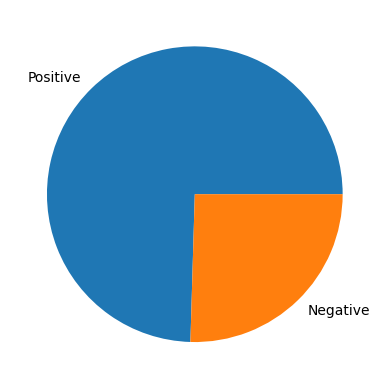

In [251]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive','Negative'])

### Handle Imbalnced Dataset

In [218]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [252]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print (vectorized_x_train_smote.shape, y_train_smote.shape)

(9444, 1166) (9444,)


In [253]:
y_train_smote.value_counts()

label
0    4722
1    4722
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x23c8b3bb9d0>,
 [Text(-4.8082529002048655e-08, 1.099999999999999, 'Positive'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'Negative')])

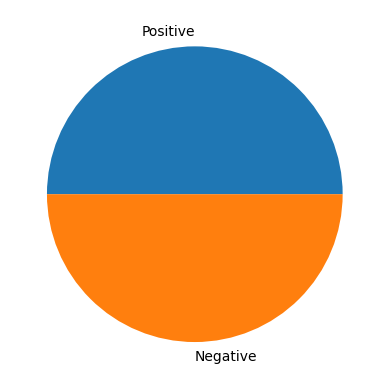

In [254]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive','Negative'])

In [255]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9439    1
9440    1
9441    1
9442    1
9443    1
Name: label, Length: 9444, dtype: int64

In [256]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1166), dtype=float32)

In [257]:
 y_test

428     0
907     0
1990    0
2824    0
3271    0
       ..
1368    0
2441    0
3273    1
431     0
6789    1
Name: label, Length: 1584, dtype: int64

In [258]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9444, 1166), dtype=float32)

### Model Training and Evaluation

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [260]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Score:\n\tAccuracy = {acc}\n\tPreecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Score:\n\tAccuracy = {acc}\n\tPreecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
        

## Logistic Regression

In [277]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = lr.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Score:
	Accuracy = 0.939
	Preecision = 0.916
	Recall = 0.967
	F1-Score = 0.941
Training Score:
	Accuracy = 0.886
	Preecision = 0.744
	Recall = 0.859
	F1-Score = 0.797


### Naive Bays

In [278]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = mnb.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Score:
	Accuracy = 0.907
	Preecision = 0.872
	Recall = 0.954
	F1-Score = 0.911
Training Score:
	Accuracy = 0.878
	Preecision = 0.702
	Recall = 0.92
	F1-Score = 0.796


### Decision Tree

In [279]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = dt.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Score:
	Accuracy = 1.0
	Preecision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Training Score:
	Accuracy = 0.831
	Preecision = 0.687
	Recall = 0.643
	F1-Score = 0.664


### Random Forest

In [280]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = rf.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Score:
	Accuracy = 1.0
	Preecision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Training Score:
	Accuracy = 0.87
	Preecision = 0.772
	Recall = 0.709
	F1-Score = 0.739


### Suport Vector Machine

In [281]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = svm.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Score:
	Accuracy = 0.978
	Preecision = 0.961
	Recall = 0.996
	F1-Score = 0.978
Training Score:
	Accuracy = 0.887
	Preecision = 0.765
	Recall = 0.816
	F1-Score = 0.79


In [283]:
import pickle
with open('../static/Model/model.pickle','wb') as file:
    pickle.dump(lr, file)